In [54]:
import pandas as pd

In [55]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [56]:
#unnamed kolonunu silme
df=df.iloc[:,1:len(df)]
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


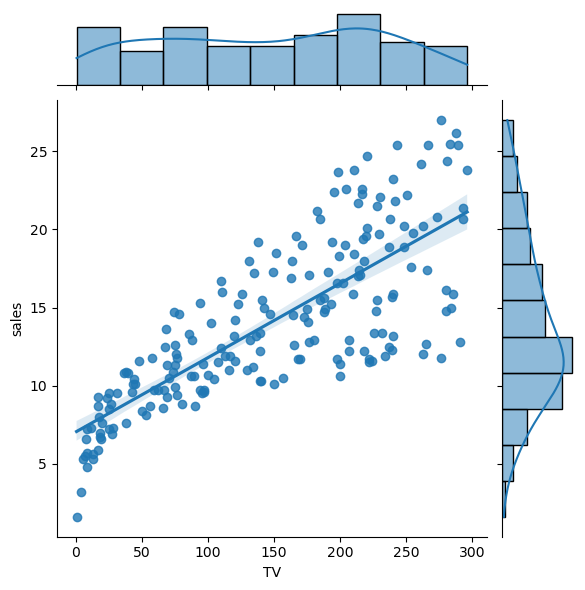

In [58]:
import seaborn as sns
sns.jointplot(x="TV",y="sales",data=df,kind="reg")
#TV ve sales arasındaki ilişkiyi modelemek reg=regresion

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
#bağımsız değişken
X=df[["TV"]]
#bağımlı değişken
y=df[["sales"]]

In [61]:
X

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [62]:
y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [63]:
reg=LinearRegression()

In [64]:
model=reg.fit(X,y)

In [65]:
model

LinearRegression()

In [66]:
str(model)

'LinearRegression()'

In [67]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [68]:
#intercept_=b0 değeridir
#coef_=b1 katsayısı
print(model.intercept_, model.coef_)

[7.03259355] [[0.04753664]]


In [69]:
#rkare -> modelin skoru
model.score(X,y)

0.611875050850071

In [70]:
"""rkare : Bağımlı değişkendeki değişikliğin,
        bağımsız değişkenlerce açıklanma yüzdesidir(modelin açılanabilirliği).
        yani bu örnekte satışlardaki değişikliğin
        yaklaşık yüzde 61 bağımsız değişkence açıklanmış."""

'rkare : Bağımlı değişkendeki değişikliğin,\n        bağımsız değişkenlerce açıklanma yüzdesidir(modelin açılanabilirliği).\n        yani bu örnekte satışlardaki değişikliğin\n        yaklaşık yüzde 61 bağımsız değişkence açıklanmış.'

#### Tahmin - Predict

(0.0, 28.27)

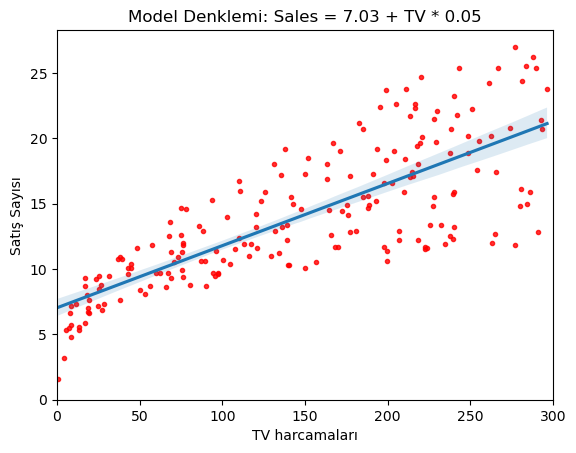

In [90]:
import matplotlib.pyplot as plt
g = sns.regplot(x="TV", y="sales", data=df, ci=95, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV * 0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV harcamaları")
plt.xlim(0, 300)
plt.ylim(bottom=0)
#ci - güven aralığı - confidence interval tahmin edilen değere gölge verir

Sales=model.intercept_ +model.coef_*TV

In [81]:
model.intercept_ + model.coef_*150
# y = b0 + b1 * xi

array([[14.16308961]])

In [82]:
model.predict([[150]])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.16308961]])

In [86]:
yeni_veri=[[150],[160],[300],[400]]

In [87]:
model.predict(yeni_veri)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.16308961],
       [14.63845602],
       [21.29358568],
       [26.04724972]])

### Artıklar ML deki önemi

##### MSE : Hata Kareler Ortalaması
##### RMSE : Hatalar Kareler Ortalaması Karekökü
###### Not-> Bunları regrasyon problemleri için kull.

In [94]:
gercek_y=y.head(10)

In [96]:
tahmin_edilen_y=pd.DataFrame(model.predict(X)[0:10])

In [98]:
hatalar=pd.concat([gercek_y,tahmin_edilen_y],axis=1)

In [102]:
hatalar.columns=["gercek_y","tahmin_edilen_y"]

In [103]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [106]:
hatalar["hata"]=hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [107]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [109]:
hatalar["hata_kareler"]=hatalar["hata"]**2

In [110]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [113]:
import numpy as np
#MSE
np.mean(hatalar["hata_kareler"])

9.290350329638105